# Financial Exploratory Analysis

This exploratory analysis seeks to better understand issues and relationships surrounding financial data. The data sources are from two categories: public domain financial data and textual data. 

In [1]:
%matplotlib inline
from financedataanalysis.data import *

In [2]:

#import bs4 as bs
#import datetime as dt
#import matplotlib.pyplot as plt
#from matplotlib import style
#from mpl_finance import candlestick_ohlc
#import numpy as np
#import os
#import pandas as pd
#import pandas_datareader.data as web
#import pickle
#import requests
#from urllib.request import urlretrieve

#style.use('ggplot')


In [3]:
# Scrape S&P 500 tickers from Wikipedia for a local reference
#def save_sp500_tickers():
#    """Get the S&P 500 tickers from Wikipedia"""
#    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#    soup = bs.BeautifulSoup(resp.text, "lxml")
#    table = soup.find('table', {'class':'wikitable sortable'})
#    tickers = []
#    for row in table.findAll('tr')[1:]:
#        ticker = row.findAll('td')[1].text
#        # fix for . and - tickers
#        mapping = str.maketrans(".","-")
#        ticker = ticker.translate(mapping)
#        tickers.append(ticker)
#    
#    # cache the results for local access
#    with open("sp500tickers.pickle", "wb") as f:
#        pickle.dump(tickers, f)
#    
#    #print(tickers)
#    return tickers

In [4]:
# Collect the ticker data using Yahoo finance API
#def get_data_from_yahoo(reload_sp500=False):
#    """Collect all the S&P500 transactional data from Yahoo.
#    
#    Parameters
#    ----------
#    reload_sp500 : bool
#    
#    Return
#    ------
#    tickers : list
#    
#    """
#    if reload_sp500:
#        tickers = pickle.load(f)
#    else:
#        with open("sp500tickers.pickle", "rb") as f:
#            tickers = pickle.load(f)
#    
#    if not os.path.exists('stock_dfs'):
#        os.makedirs('stock_dfs')
#    
#    start = dt.datetime(2000,1,1)
#    end = dt.datetime(2018,12,31)
#    
#    for ticker in tickers:
#        print(ticker)
#        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
#            df = web.DataReader(ticker, 'yahoo', start, end)
#            df.to_csv('stock_dfs/{}.csv'.format(ticker))
#        else:
#            print('Already cached {}'.format(ticker))
    

In [5]:
#get_data_from_yahoo()

In [6]:
# Merge the transactional data into single DataFrame
#def compile_data():
#    """Merge all the stock data into single DataFrame"""
#    with open("sp500tickers.pickle", "rb") as f:
#        tickers = pickle.load(f)
#    
#    main_df = pd.DataFrame()
#    
#    for count,ticker in enumerate(tickers):
#        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
#        df.set_index('Date', inplace=True)
#        df.rename(columns = {'Adj Close':ticker}, inplace=True)
#        df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
#        
#        if main_df.empty:
#            main_df = df
#        else:
#            main_df = main_df.join(df, how='outer')
#        
#        if count % 10 == 0:
#            print(count)
#        
#    print(main_df.head())
#    main_df.to_csv('sp500_joined_closes.csv')
    

In [7]:
#compile_data()

## Exploratory analysis for relationships in the data

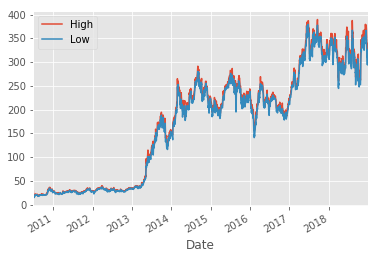

In [8]:
#
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)
df = web.DataReader('TSLA', 'yahoo', start, end)

#df.head()
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
#df.plot()
#df['Adj Close'].plot()
df[['High','Low']].plot()

In [9]:
# Create 100 day rolling average data as a column in dataset
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.head()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015,318.4833
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996,318.2488
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005,317.9284
2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995,317.8472
2018-12-31,339.209991,325.260010,337.790009,332.799988,6302300,332.799988,317.3795


<BarContainer object of 2142 artists>

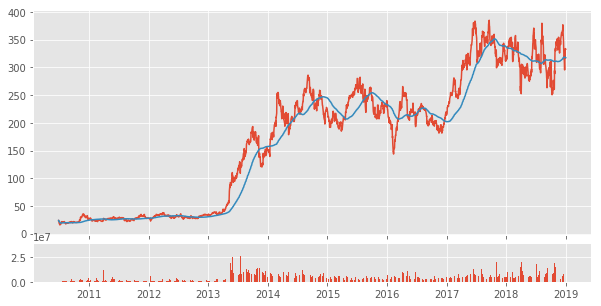

In [10]:
# Configure plot
plt.rcParams['figure.figsize'] = [10, 5]

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)  # share the X axis for zooming :)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

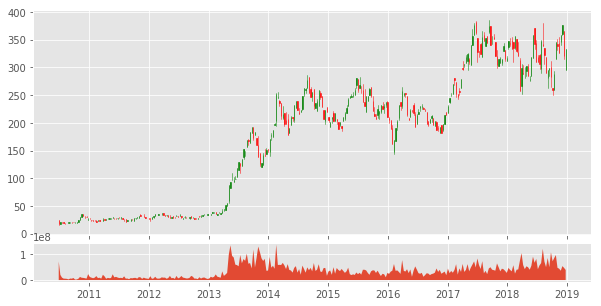

In [11]:
# Candlestick plot vs Volume

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

plt.rcParams['figure.figsize'] = [10, 5]
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)  # share the X axis for zooming :)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

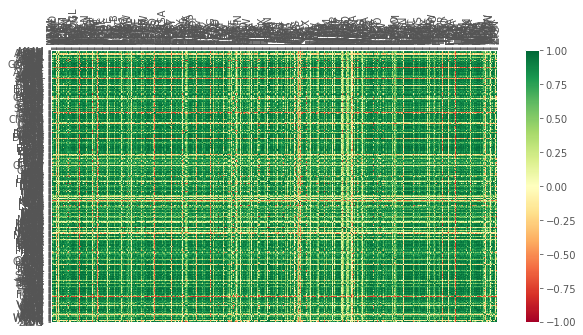

In [13]:
# Visualize the correlation of ticker 'Adj Close' data
visualize_data_correlation()

In [14]:
# Preprocessing for ML modeling
from collections import Counter
from sklearn import svm, model_selection as cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def process_data_for_labels(ticker):
    """blah"""
    predict_days = 7  # predict future price in days
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, predict_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace=True)
    return tickers, df

In [15]:
#process_data_for_labels('BAC')

In [16]:
def buy_sell_hold(*args):
    """blah"""
    cols = [c for c in args]
    requirement = 0.02  # 2% change fires buy or sell trigger
    for col in cols:
        if col > requirement:
            return 1  # buy
        if col < requirement:
            return -1  # sell
    return 0

In [17]:
# 
def extract_bsh_featuresets(ticker):
    """blah"""
    tickers,df = process_data_for_labels(ticker)
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]
                                               ))
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread: ', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df - df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()  # normalize the values
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    # X are featuresets, y are labels
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

In [18]:
#extract_bsh_featuresets('AAPL')

In [19]:
# ML Classifier
def do_ml(ticker):
    """blah"""
    X, y, df = extract_bsh_featuresets(ticker)
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
    
    clf = neighbors.KNeighborsClassifier()
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    predictions = clf.predict(X_test)
    
    print('Predicted spread: ', Counter(predictions))
    print('Accuracy: ', confidence)
    
    return confidence
    

In [20]:
do_ml('BAC')

Data spread:  Counter({'-1': 4165, '1': 614})
Predicted spread:  Counter({-1: 1180, 1: 15})
Accuracy:  0.8652719665271966


0.8652719665271966